### Serie "white noise"
Una serie temporale è definita "white noise" se le osservazioni (correlazione 0 fra le osservazioni) sono indipendenti e distribuite identicamente con media 0 e varianza costante. Se la serie è ricavata da una distribuzione gaussiana parliamo di "White noise gaussiano".
Le serie temporali "white noise" sono importanti perché così dovrebbero essere distribuiti idealmente i residui di un modello di previsione

Brownlee (2020) Introduction to time series forecasting with Python - cap. 10

Tre domande per capire se una serie è "white noise":

- ha media 0 o no? (media 0)
- la varianza cambia nel tempo? (varianza costante)
- il valore di una certa data è correlato a quelli ritardati?  (correlazione 0)

In [1]:
# Creiamo il whit noise

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
seed(1)
series = [gauss(0.0, 1.0) for i in range (1000)]
series = Series(series)

In [2]:
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


Come si può vedere la media è circa 0, è circa uguale alla mediana (quantile 50%)  e la deviazione standard è circa 1. Se moltiplichiamo per 10 o 100 le estrazioni convergiamo ai valori teorici

In [9]:
series = [gauss(0.0, 1.0) for i in range (10000)]
series = Series(series)

In [10]:
print(series.describe())

count    10000.000000
mean         0.015868
std          0.999834
min         -3.477359
25%         -0.665101
50%          0.037892
75%          0.698387
max          4.003406
dtype: float64


Facendo il grafico non riscontriamo nessuna tendenza

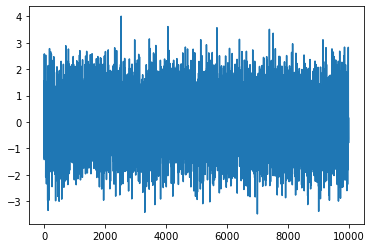

In [11]:
series.plot()
pyplot.show()

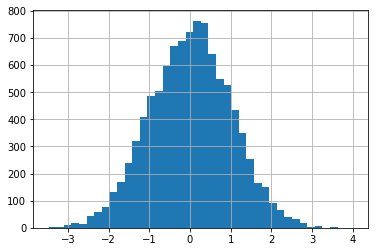

In [12]:
series.hist(bins = 40)
pyplot.show()

Verifichiamo se è vero che le autocorrelazioni (cioè la correlazione di ciascun elemento con quelli precedenti con vari intervalli (ritardi))

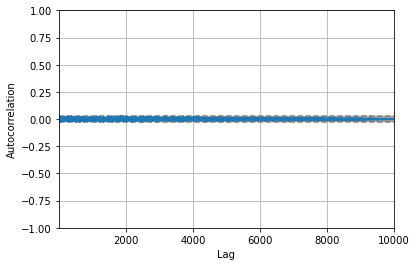

In [13]:
autocorrelation_plot(series)
pyplot.show()

### Random walk

In matematica, una passeggiata aleatoria (random walk) è la formalizzazione dell'idea di prendere passi successivi in direzioni casuali. Matematicamente parlando, è il processo stocastico più semplice, il processo markoviano, la cui rappresentazione matematica più nota è costituita dal processo di Wiener.

A random walk is defined as a process where the current value of a variable is composed of the past value. plus an error term defined as a white noise (a normal variable with zero mean and variance one).

Il termine fu introdotto per la prima volta da Karl Pearson nel 1905.[1]
Brownlee (2020) Introduction to time series forecasting with Python - cap. 10

Generiamo una serie casuale

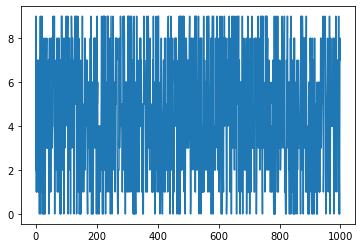

In [14]:
from random import seed
from random import randrange
from matplotlib import pyplot
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

Generiamo una "passeggiata casuale"

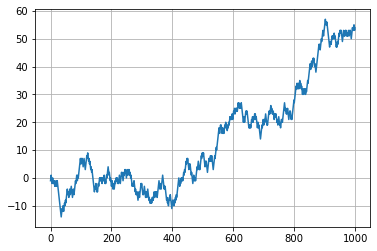

In [18]:
from random import random
seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.grid(True)
pyplot.show()

Autocorrelazioni

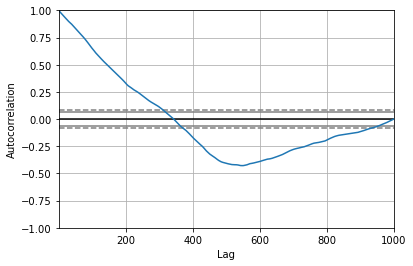

In [23]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
seed(5)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

Stazionarietà

In [25]:

from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller # Test Augmented Dickey-Fuller per stazionarietà
# Generiamo il random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# Test statistici
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Rendiamo stazionario il random walk facendone le differenze prime

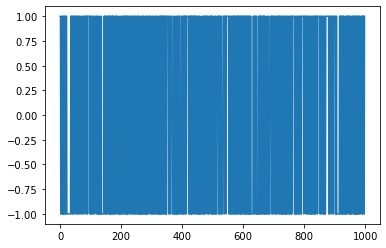

In [26]:
# Generiamo il random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# Creiamo la serie di differenze

diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()


Esaminiamo il correlogramma della serie di differenze

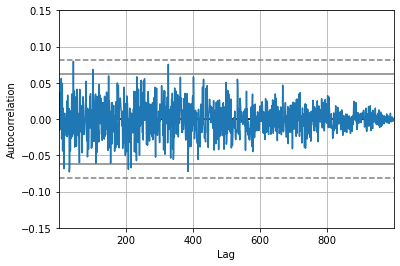

In [28]:
autocorrelation_plot(diff)
pyplot.ylim(-0.15, 0.15)
pyplot.show()

### Misure di precisione delle previsioni

Brownlee (2020) Introduction to time series forecasting with Python - cap. 10

Calcolo dell'errore di previsione

In [29]:
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i] - predictions[i] for i in range(len(expected))]
print('Forecast errors: %s' % forecast_errors)

Forecast errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


Errore medio di previsione (bias)

In [30]:
bias = sum(forecast_errors)/len(expected)
print('Bias: %f' % bias)

Bias: -0.100000


Errore medio assoluto

In [31]:
from sklearn.metrics import mean_absolute_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mae = mean_absolute_error(expected, predictions)
print('Mae: %f' % mae)

Mae: 0.140000


In [40]:
abs_forecast_errors = [abs(expected[i] - predictions[i]) for i in range(len(expected))]
mae_1 = sum(abs_forecast_errors)/len(expected)
print('Mae_1: %f' % mae_1)

Mae_1: 0.140000


Errore quadratico medio

In [32]:
from sklearn.metrics import mean_squared_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
print('Mse: %f' % mse)

Mse: 0.022000


In [42]:
sqrt_forecast_errors = [(expected[i] - predictions[i])**2 for i in range(len(expected))]
mae_2 = sum(sqrt_forecast_errors)/len(expected)
print('Mae_2: %f' % mae_2)

Mae_2: 0.022000


Root Mean Squared Error (RMSE)  - Radice quadrata dell'errore quadratico medio

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('Rmse: %f' % rmse)

Rmse: 0.148324


#### Si può prevedere un random walk?

Brownlee (2020) Introduction to time series forecasting with Python - cap. 11

Creiamo una "previsione ingenua" (naive forecast) costruita assumendo che il valore di domani sia uguale a quello di oggi (persistence model) 

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
seed(1)
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1,1000):
    movement = -1 if random() <0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
predictions = list() # oppure semplicemente []
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history=test[i]
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)


Persistence RMSE: 1.000


Proviamo con una previsione più sofisticata. Costruiamo le previsioni utilizzando lo stesso processo che crea il random walk, cioè aumenti o diminuzioni di + o - 1.


In [34]:
# Generiamo il random walk
random_walk = list()
random_walk.append(-1 if random() <0.5 else 1)
for i in range(1,1000):
    movement = -1 if random() <0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

# prepariamo il dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# facciamo le previsioni usando lo stesso processo
predictions = list()
history = train[-1]

for i in range(len(test)):
    yhat = history + (-1 if random() <0.5 else 1)
    predictions.append(yhat)
    history = test[i]
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.427


L'errore è aumentato!

### Creazione dei dati di stima e test (train and test)

Brownlee (2020) Introduction to time series forecasting with Python - cap. 16

Train - test split

In [36]:
# 147
from pandas import read_csv
series = read_csv('sunspots.csv', header = 0, index_col =0, parse_dates = True, squeeze = True)
X = series.values
train_size = int(len(X)*0.66)
train, test = X[0:train_size], X[train_size:]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2820
Training Observations: 1861
Testing Observations: 959


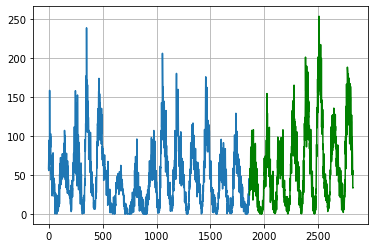

In [37]:

pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test], color = 'g')
pyplot.grid(True)
pyplot.show()

Train-Test split multipli con la libreria di scikit-learn TimeSeriesSplit

 Split 1: 705 train, 705 test

 Split 2: 1,410 train, 705 test

 Split 3: 2,115 train, 705 test

Observations: 2820
Training Observations: 705
Testing Observations: 705
Observations: 2820
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


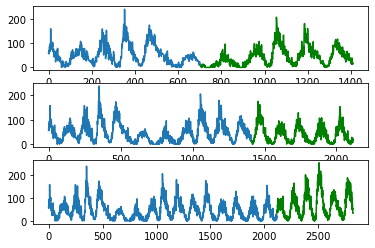

In [38]:

from sklearn.model_selection import TimeSeriesSplit

series = read_csv('sunspots.csv', header = 0, index_col =0, parse_dates = True, squeeze = True)
X = series.values
splits = TimeSeriesSplit(n_splits = 3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(X)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test], color = 'g')
    index += 1
pyplot.show()